In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'

warnings.filterwarnings(action='ignore')

df = pd.read_csv("../data/지역별 일반건강검진 대상 및 수검인원 현황.csv", encoding='cp949')

df.head(10)

,시군구별(1),시군구별(2),성별(1),2018,2018.1
0,시군구별(1),시군구별(2),성별(1),1차검진,1차검진
1,시군구별(1),시군구별(2),성별(1),대상인원 (명),수검인원 (명)
2,계,소계,합계,19593149,15076899
3,계,소계,남자,10393820,8106914
4,계,소계,여자,9199329,6969985
5,서울,소계,합계,3606425,2687536
6,서울,소계,남자,1816207,1353221
7,서울,소계,여자,1790218,1334315
8,서울,종로구,합계,56279,39474
9,서울,종로구,남자,27770,19198


In [ ]:
df.isnull().sum()

In [141]:
df = df[(df['시군구별(2)'] != '소계') & (df['성별(1)'] == '합계')]
df['2018'] = df['2018'].astype(float)
df['2018.1'] = df['2018.1'].astype(float)
df.head(5)

,시군구별(1),시군구별(2),성별(1),2018,2018.1
8,서울,종로구,합계,56279.0,39474.0
11,서울,중구,합계,49032.0,34049.0
14,서울,용산구,합계,81897.0,56632.0
17,서울,성동구,합계,112078.0,82023.0
20,서울,광진구,합계,132608.0,99379.0


In [ ]:
df.shape

In [142]:
df['수검율'] = df['2018.1'] / df['2018'] * 100

df.head()

,시군구별(1),시군구별(2),성별(1),2018,2018.1,수검율
8,서울,종로구,합계,56279.0,39474.0,70.139839
11,서울,중구,합계,49032.0,34049.0,69.442405
14,서울,용산구,합계,81897.0,56632.0,69.150274
17,서울,성동구,합계,112078.0,82023.0,73.183854
20,서울,광진구,합계,132608.0,99379.0,74.941934


In [143]:
df = df.drop('성별(1)', axis=1)

df.head()

,시군구별(1),시군구별(2),2018,2018.1,수검율
8,서울,종로구,56279.0,39474.0,70.139839
11,서울,중구,49032.0,34049.0,69.442405
14,서울,용산구,81897.0,56632.0,69.150274
17,서울,성동구,112078.0,82023.0,73.183854
20,서울,광진구,132608.0,99379.0,74.941934


In [144]:
df2 = pd.read_csv("../data/지역별 일반건강검진 1차 판정현황.csv", encoding='cp949')

df2.head(5)

,시군구별(1),시군구별(2),성별(1),2018,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6
0,시군구별(1),시군구별(2),성별(1),계(1차 수검인원),정상A,정상B(경계),질환의심,질환의심,질환의심,유질환자
1,시군구별(1),시군구별(2),성별(1),소계,소계,소계,실인원,일반 질환의심,고혈압 당뇨병 질환의심(2차 검진대상자),소계
2,계,소계,합계,15076899,1894966,5050957,4584731,3987020,1347170,3546245
3,계,소계,남자,8106914,650984,2638504,2912435,2533390,923456,1904991
4,계,소계,여자,6969985,1243982,2412453,1672296,1453630,423714,1641254


In [ ]:
df2.isnull().sum()

In [145]:
df2 = df2[(df2['시군구별(2)'] != '소계') & (df2['성별(1)'] == '합계')]
df2['2018'] = df2['2018'].astype(float)
df2['2018.1'] = df2['2018.1'].astype(float)
df2['2018.2'] = df2['2018.2'].astype(float)
df2['2018.3'] = df2['2018.3'].astype(float)
df2['2018.6'] = df2['2018.6'].astype(float)

df2.shape

(249, 10)

In [146]:
df2 = df2.drop(['성별(1)', '2018.4', '2018.5'], axis=1)

df2.head()

,시군구별(1),시군구별(2),2018,2018.1,2018.2,2018.3,2018.6
8,서울,종로구,39474.0,5516.0,13149.0,11706.0,9103.0
11,서울,중구,34049.0,4937.0,10666.0,10423.0,8023.0
14,서울,용산구,56632.0,8640.0,19237.0,16207.0,12548.0
17,서울,성동구,82023.0,11885.0,26418.0,24800.0,18920.0
20,서울,광진구,99379.0,14207.0,32925.0,30319.0,21928.0


In [147]:
df2['이상있음'] = (df2['2018.3'] + df2['2018.6']) / df2['2018']
df2['이상없음'] = (df2['2018.1'] + df2['2018.2']) / df2['2018']

df2.head()

,시군구별(1),시군구별(2),2018,2018.1,2018.2,2018.3,2018.6,이상있음,이상없음
8,서울,종로구,39474.0,5516.0,13149.0,11706.0,9103.0,0.527157,0.472843
11,서울,중구,34049.0,4937.0,10666.0,10423.0,8023.0,0.541749,0.458251
14,서울,용산구,56632.0,8640.0,19237.0,16207.0,12548.0,0.507752,0.492248
17,서울,성동구,82023.0,11885.0,26418.0,24800.0,18920.0,0.533021,0.466979
20,서울,광진구,99379.0,14207.0,32925.0,30319.0,21928.0,0.525735,0.474265


In [ ]:
df.head()

In [148]:
normal_health = pd.DataFrame(df['시군구별(1)'])
normal_health['시군구별(2)'] = df['시군구별(2)'] 
normal_health['수검율'] = df['수검율']
normal_health['이상있음'] = df2['이상있음']
normal_health['이상없음'] = df2['이상없음']
normal_health = normal_health.reset_index(drop=True, col_level = 0)

print(normal_health.head())

normal_health.to_csv("./result/processed_지역별 일반건강검진 결과 판정 현황.csv", index = False, header = False, encoding='utf-8')
normal_health.to_csv("./result/processed_지역별 일반건강검진 결과 판정 현황_header.csv", index = False, encoding='utf-8')

  시군구별(1) 시군구별(2)        수검율      이상있음      이상없음
0      서울     종로구  70.139839  0.527157  0.472843
1      서울      중구  69.442405  0.541749  0.458251
2      서울     용산구  69.150274  0.507752  0.492248
3      서울     성동구  73.183854  0.533021  0.466979
4      서울     광진구  74.941934  0.525735  0.474265


In [149]:
normal_health = pd.read_csv("./result/processed_지역별 일반건강검진 결과 판정 현황_header.csv", encoding='utf-8')

normal_health.head()

,시군구별(1),시군구별(2),수검율,이상있음,이상없음
0,서울,종로구,70.139839,0.527157,0.472843
1,서울,중구,69.442405,0.541749,0.458251
2,서울,용산구,69.150274,0.507752,0.492248
3,서울,성동구,73.183854,0.533021,0.466979
4,서울,광진구,74.941934,0.525735,0.474265


In [150]:
normal_health.groupby(['시군구별(1)', '시군구별(2)']).mean().index

MultiIndex([('강원',    '강릉시'),
            ('강원',    '고성군'),
            ('강원',    '동해시'),
            ('강원',    '삼척시'),
            ('강원',    '속초시'),
            ('강원',    '양구군'),
            ('강원',    '양양군'),
            ('강원',    '영월군'),
            ('강원',    '원주시'),
            ('강원',    '인제군'),
            ...
            ('충북',    '옥천군'),
            ('충북',    '음성군'),
            ('충북',    '제천시'),
            ('충북',    '증평군'),
            ('충북',    '진천군'),
            ('충북', '청주시상당구'),
            ('충북', '청주시서원구'),
            ('충북', '청주시청원구'),
            ('충북', '청주시흥덕구'),
            ('충북',    '충주시')],
           names=['시군구별(1)', '시군구별(2)'], length=249)

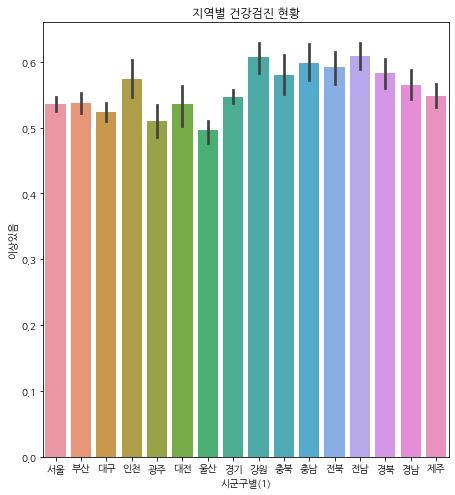

In [151]:
import seaborn as sns

plt.figure(figsize=(16,8))

plt.subplot(121)
sns.barplot(data = normal_health, x = "시군구별(1)", y = "이상있음")
plt.title('지역별 건강검진 현황')

plt.show()

In [152]:
temp = pd.read_csv("../data/시군구별 코드.csv", encoding='utf-8')

temp['시군구별(1)'].unique()
temp.head()

,시군구별(1),시군구별(2),SIG_CD
0,서울,NaN,11000
1,서울,종로구,11110
2,서울,중구,11140
3,서울,용산구,11170
4,서울,성동구,11200


In [153]:
normal_health['시군구별(1)'].unique()

array(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '경기', '강원', '충북', '충남',
       '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [154]:
merge = pd.merge(temp, normal_health)

merge.head()
merge.to_csv("./result/merge.csv", index = False, encoding='utf-8')

In [155]:
import folium
import json

korea_location = [37.563, 126.982]
m = folium.Map(location=korea_location, tiles="OpenStreetMap", zoom_start=7)

geojson_data = None
with open(r'../data/SIG_202101/TL_SCCO_SIG_WGS84.json', encoding='utf-8') as f:
    geojson_data = json.load(f)
    
data = pd.read_csv('./result/merge.csv', encoding='utf-8')

data = data.sort_values('이상있음', ascending=False)
data['SIG_CD'] = data['SIG_CD'].astype('str')

In [156]:
folium.Choropleth(
    geo_data=geojson_data, data=data,
    columns=['SIG_CD', '이상있음'],
    key_on='feature.properties.SIG_CD',
    fill_color='YlOrRd', reset=True
    ).add_to(m)

m.save(outfile="./result/visualizing.html")